### Compute Trending Duration
We need to calculate how long each video stayed trending:

In [13]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\91961\Downloads\youtube_trending_with_categories.csv")

# Split date into parts (assuming format: YY.DD.MM)
df[['year', 'day', 'month']] = df['trending_date'].str.split('.', expand=True)

# Convert 'year' to full format (assuming '17' → '2017' and '18' → '2018')
df['year'] = df['year'].apply(lambda x: '20' + x if int(x) < 50 else '19' + x)  # Adjust for potential century shift

# Combine back into YYYY-MM-DD format
df["trending_date"] = df["year"] + "-" + df["month"] + "-" + df["day"]

# Convert to datetime format
df["trending_date"] = pd.to_datetime(df["trending_date"], errors="coerce")

print("✅ Corrected trending_date format:", df["trending_date"].head())

✅ Corrected trending_date format: 0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]


### Ensure trending_duration is Created

In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv(r"C:\Users\91961\Downloads\youtube_trending_with_categories.csv")

# Convert trending_date to datetime format
df[['year', 'day', 'month']] = df['trending_date'].str.split('.', expand=True)
df['year'] = df['year'].apply(lambda x: '20' + x if int(x) < 50 else '19' + x) 
df["trending_date"] = pd.to_datetime(df["year"] + "-" + df["month"] + "-" + df["day"], errors="coerce")

# ✅ Compute trending duration (days between first and last trending date)
df["trending_duration"] = df.groupby("video_id")["trending_date"].transform(lambda x: (x.max() - x.min()).days)

# Check if the column exists
print("✅ Columns in the DataFrame:", df.columns)
print("🔍 Sample trending_duration values:", df["trending_duration"].head())

✅ Columns in the DataFrame: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'year', 'day',
       'month', 'trending_duration'],
      dtype='object')
🔍 Sample trending_duration values: 0    6
1    6
2    6
3    6
4    6
Name: trending_duration, dtype: int64


### Time-Series Visualization for Trending Duration Over Time

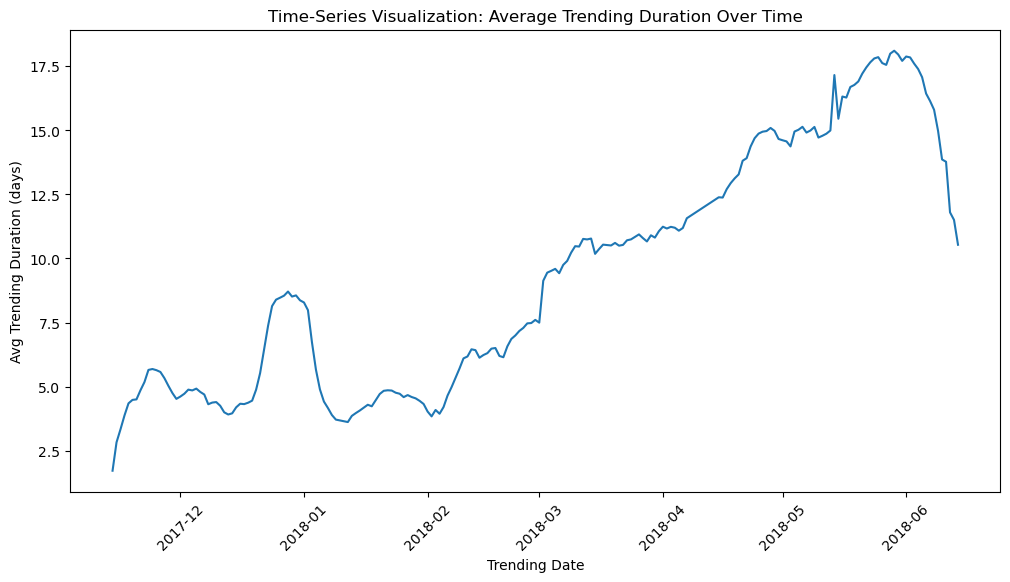

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate average trending duration over time
df_avg_duration = df.groupby("trending_date")["trending_duration"].mean().reset_index()

# Plot the time-series trend
plt.figure(figsize=(12,6))
sns.lineplot(x="trending_date", y="trending_duration", data=df_avg_duration)
plt.xlabel("Trending Date")
plt.ylabel("Avg Trending Duration (days)")
plt.title("Time-Series Visualization: Average Trending Duration Over Time")
plt.xticks(rotation=45)
plt.show()

### ✅ Observations from Graph
- 📈 Upward trend: The average trending duration increased steadily from Dec 2017 to mid-2018.
- 📉 Sharp decline: There’s a noticeable drop in trending duration towards the end of the period—possible algorithm changes or content shifts.
- 🔄 Fluctuations: Trending duration varied across different points, suggesting some categories or video types might hold engagement longer.


### Compare Trending Duration Across Categories
To see which content categories trend the longest:

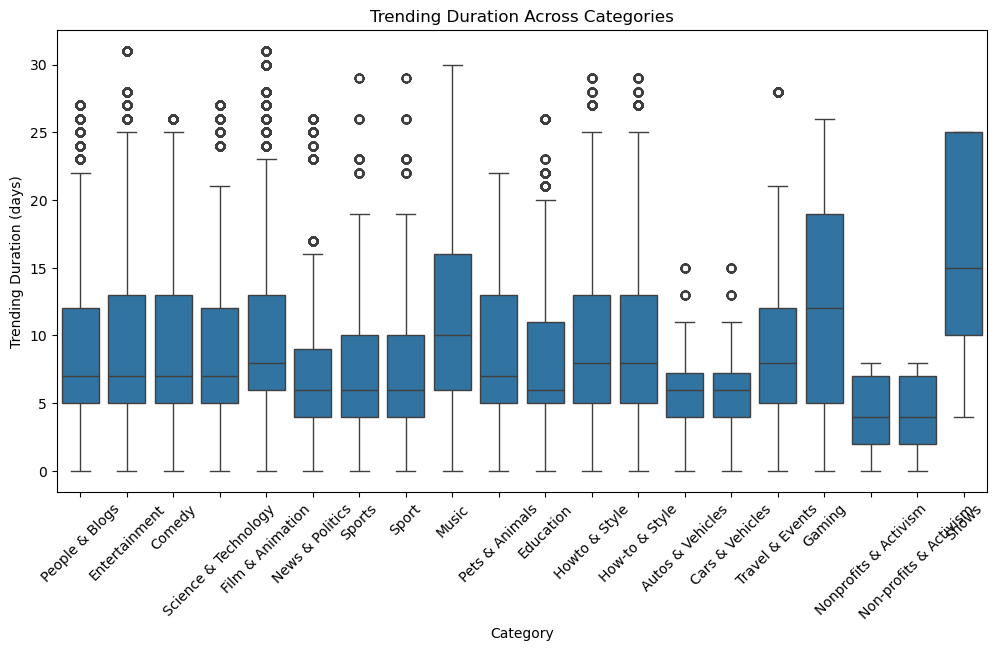

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x="category_name", y="trending_duration", data=df)
plt.xlabel("Category")
plt.ylabel("Trending Duration (days)")
plt.title("Trending Duration Across Categories")
plt.xticks(rotation=45)
plt.show()


### ✅ Key Observations from Box Plot
- 🎭 Film & Animation and Music tend to have the longest trending durations, possibly due to strong fan engagement and viral appeal.
- 🎤 Entertainment and Comedy show moderate trending durations, likely driven by audience interaction but with faster content turnover.
- 📺 News & Politics, Science & Technology, and Education generally have shorter trending durations, suggesting they may trend briefly before newer content takes over.
- 🎮 Gaming appears to have highly variable durations, indicating some games trend briefly while others gain sustained popularity.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\91961\Downloads\youtube_trending_with_categories.csv")

# Display column names
print("✅ Columns in dataset:", df.columns)

✅ Columns in dataset: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name'],
      dtype='object')
